In [1]:
from diffusers import DDPMPipeline, DDIMPipeline, PNDMPipeline, UNet2DModel
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import math

/home/claserken/mambaforge/envs/diffusion/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
model_id = "google/ddpm-celebahq-256"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# load model and scheduler
ddpm = DDPMPipeline.from_pretrained(model_id).to(device)  # you can replace DDPMPipeline with DDIMPipeline or PNDMPipeline for faster inference

diffusion_pytorch_model.safetensors not found
Loading pipeline components...: 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]


In [29]:
ddpm.unet = UNet2DModel.from_pretrained('/home/claserken/Developer/dataunlearning/checkpoints/celeb/deletion/2024-09-15_01-39-20/checkpoint-3000/unet').to(device)

In [30]:
images = ddpm(batch_size=16, num_inference_steps=100)[0]

100%|██████████| 100/100 [00:41<00:00,  2.40it/s]


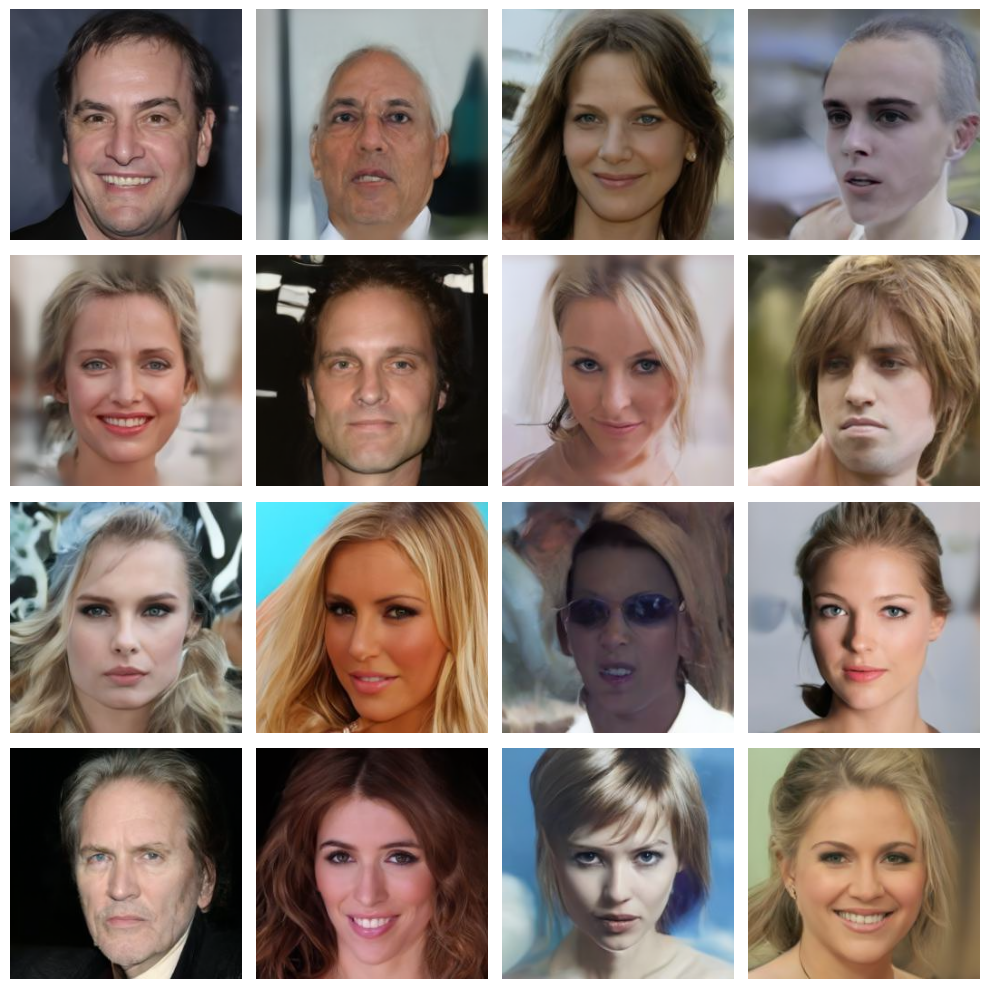

In [31]:
# Calculate the number of rows and columns based on the number of images
n_images = len(images)
n_cols = math.ceil(math.sqrt(n_images))  # Number of columns
n_rows = math.ceil(n_images / n_cols)    # Number of rows

# Create subplots with the dynamically calculated rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))

# Flatten axes array if necessary, for easy iteration
axes = axes.flatten()

# Loop through the images and display them in the grid
for i, img in enumerate(images):
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide the axis

# Hide any remaining empty subplots (if the number of images is not a perfect square)
for i in range(n_images, len(axes)):
    axes[i].axis('off')  # Turn off axis for any extra subplots

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()